In [2]:
# libraries used:

library(DAAG)       #required by most exercises
library(psych)      # pairs.panels(), a neat pairplot for EDA
library(car)        # car::vif(), for exercise 6.7
library(MASS)       # lm.ridge()
library(broom)      # glance(), quick vision of a model
library(ggplot2)    # graphics
library(simpleboot) # bootstrapping linear models for ex 6.8
library(plot3D)     # lovely 3D graph in ex 6.8
library(boot)       # bootstrapping
library(lmridge)    # alternative ridge regression library

# Exercise 8.6

The following investigates the consequences of not using a logarithmic transformation for the
nihills data analysis. The second differs from the first in having a dist × climb interaction
term, additional to linear terms in dist and climb.

(a) Fit the two models:

```
nihills.lm <- lm(time ˜ dist+climb, data=nihills)
nihills2.lm <- lm(time ˜ dist+climb+dist:climb, data=nihills)
anova(nihills.lm, nihills2.lm)```

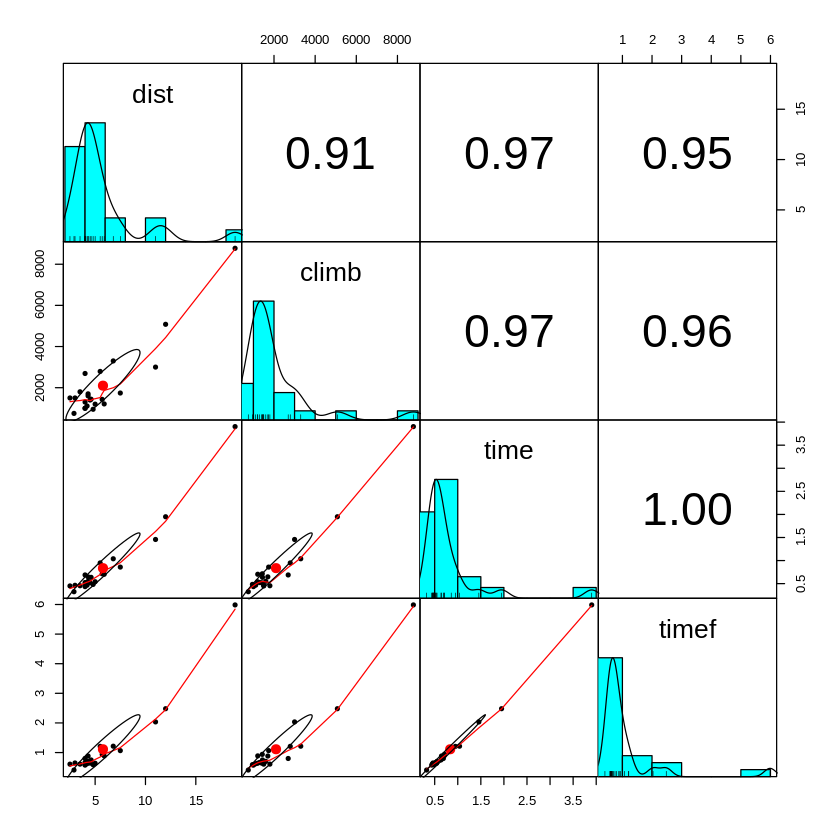

In [3]:
pairs.panels(nihills, gap=0)

In [4]:
summary(nihills)

      dist            climb           time            timef       
 Min.   : 2.500   Min.   : 750   Min.   :0.3247   Min.   :0.4092  
 1st Qu.: 4.000   1st Qu.:1205   1st Qu.:0.4692   1st Qu.:0.6158  
 Median : 4.500   Median :1500   Median :0.5506   Median :0.7017  
 Mean   : 5.778   Mean   :2098   Mean   :0.8358   Mean   :1.1107  
 3rd Qu.: 5.800   3rd Qu.:2245   3rd Qu.:0.7857   3rd Qu.:1.0014  
 Max.   :18.900   Max.   :8775   Max.   :3.9028   Max.   :5.9856  

In [5]:
nihills.lm  <- lm(time ~ dist+climb           , data=nihills)
nihills2.lm <- lm(time ~ dist+climb+dist:climb, data=nihills) 

In [6]:
summary(nihills.lm)


Call:
lm(formula = time ~ dist + climb, data = nihills)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.19857 -0.04824  0.01701  0.05539  0.21083 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.286e-01  4.025e-02  -5.679 1.47e-05 ***
dist         1.008e-01  1.382e-02   7.293 4.72e-07 ***
climb        2.298e-04  2.893e-05   7.941 1.31e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0973 on 20 degrees of freedom
Multiple R-squared:  0.9852,	Adjusted R-squared:  0.9838 
F-statistic: 667.6 on 2 and 20 DF,  p-value: < 2.2e-16


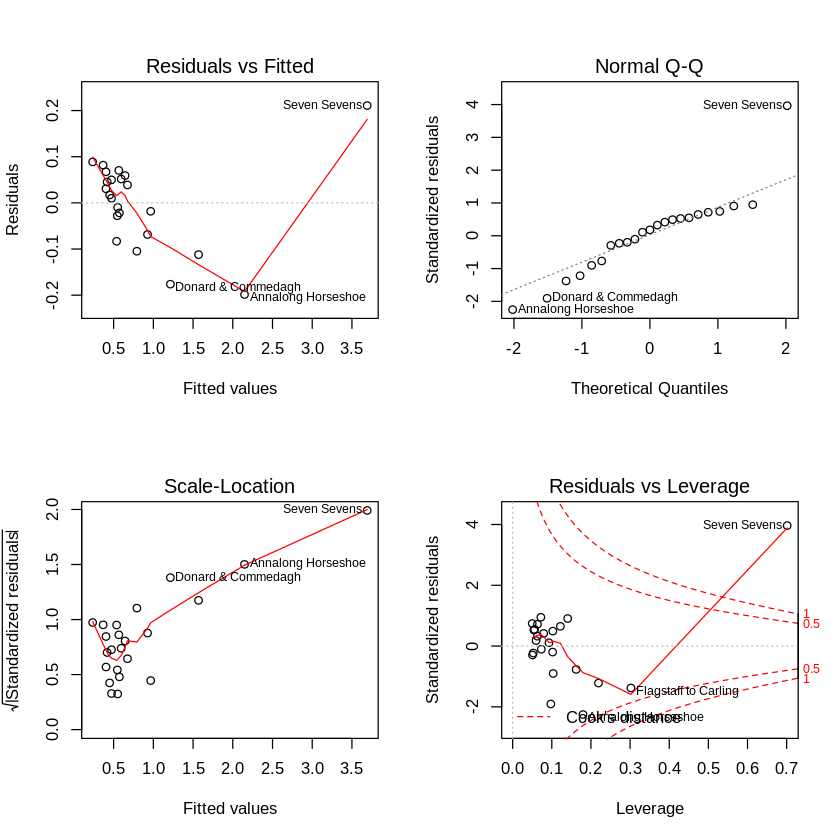

In [7]:
par(mfrow=c(2,2))
plot(nihills.lm)

In [8]:
summary(nihills2.lm)


Call:
lm(formula = time ~ dist + climb + dist:climb, data = nihills)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.07854 -0.03182 -0.01334  0.02894  0.08711 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.677e-02  3.744e-02   1.249   0.2267    
dist        6.962e-02  7.427e-03   9.374 1.48e-08 ***
climb       9.988e-05  2.040e-05   4.896   0.0001 ***
dist:climb  9.964e-06  1.171e-06   8.509 6.62e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04552 on 19 degrees of freedom
Multiple R-squared:  0.9969,	Adjusted R-squared:  0.9964 
F-statistic:  2058 on 3 and 19 DF,  p-value: < 2.2e-16


Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”

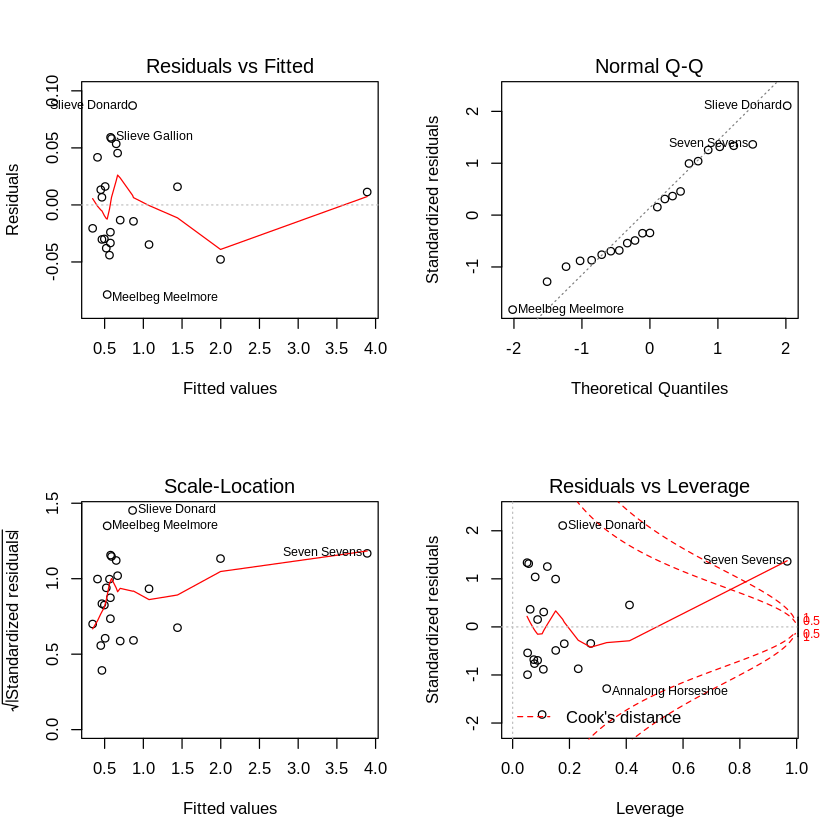

In [9]:
par(mfrow=c(2,2))
plot(nihills2.lm)

In [10]:
anova(nihills.lm, nihills2.lm)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
20,0.18936094,NA,NA,NA,NA
19,0.03936124,1,0.1499997,72.4061,6.623143e-08


**Commentary:**

Including outsider values, the model 

## part b

(b) Using the F-test result, make a tentative choice of model, and proceed to examine diagnostic plots. Are there any problematic observations? What happens if these points are
removed? Refit both of the above models, and check the diagnostics again.

[1] "Outsiders:"


,dist,climb,time,timef
Annalong Horseshoe,12.0,5080,1.949167,2.480556
Flagstaff to Carling,11.0,3000,1.456944,2.034444
Seven Sevens,18.9,8775,3.902778,5.985556


[1] "Dataset - outsiders:"


,dist,climb,time,timef
Binevenagh,7.5,1740,0.8583333,1.0644444
Slieve Gullion,4.2,1110,0.4666667,0.6230556
Glenariff Mountain,5.9,1210,0.7030556,0.8869444
Donard & Commedagh,6.8,3300,1.0386111,1.2141667
McVeigh Classic,5.0,1200,0.5411111,0.6375000
Tollymore Mountain,4.8,950,0.4833333,0.5886111
Slieve Martin,4.3,1600,0.5505556,0.7016667
Moughanmore,3.0,1500,0.4636111,0.6475000
Hen & Cock,2.5,1500,0.4497222,0.6075000
Monument Race,4.0,1000,0.4716667,0.5947222


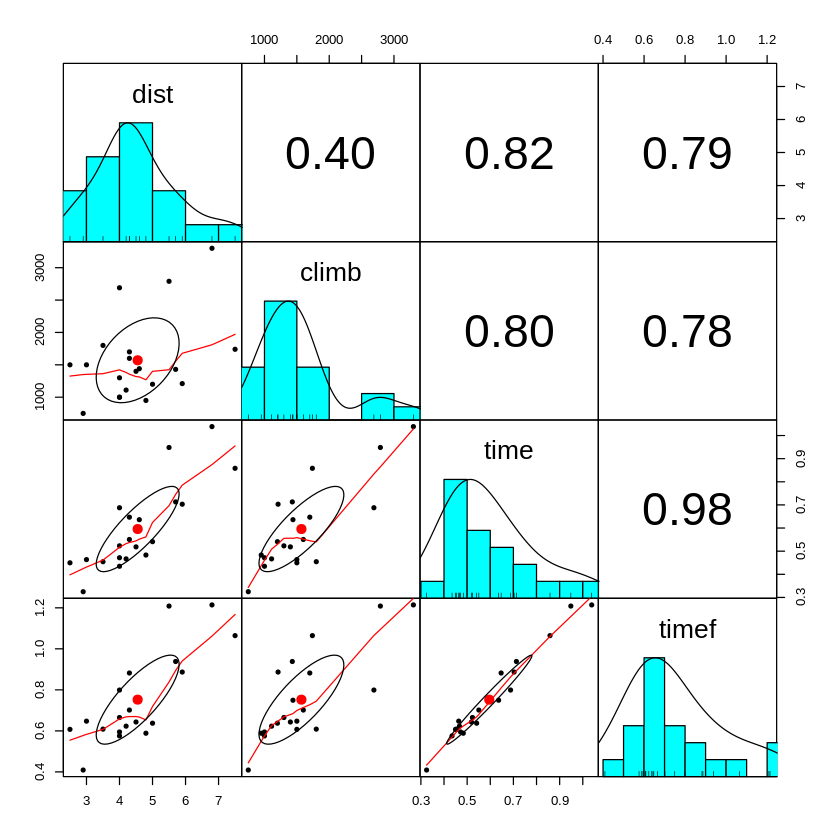

In [11]:
outsiders = nihills[c(10,17,19),]
print("Outsiders:")
outsiders
nihills.clean = nihills[-c(10,17,19),]
print("Dataset - outsiders:")
nihills.clean
pairs.panels(nihills.clean, gap=0)

In [12]:
nihills.clean.lm  <- lm(time ~ dist+climb           , data=nihills.clean)
nihills2.clean.lm <- lm(time ~ dist+climb+dist:climb, data=nihills.clean) 

In [13]:
summary(nihills.clean.lm)


Call:
lm(formula = time ~ dist + climb, data = nihills.clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.085066 -0.030909 -0.008891  0.040014  0.075740 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.407e-02  4.040e-02  -1.338    0.198    
dist         8.815e-02  9.009e-03   9.785 2.13e-08 ***
climb        1.584e-04  1.726e-05   9.177 5.37e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04524 on 17 degrees of freedom
Multiple R-squared:  0.9462,	Adjusted R-squared:  0.9399 
F-statistic: 149.4 on 2 and 17 DF,  p-value: 1.632e-11


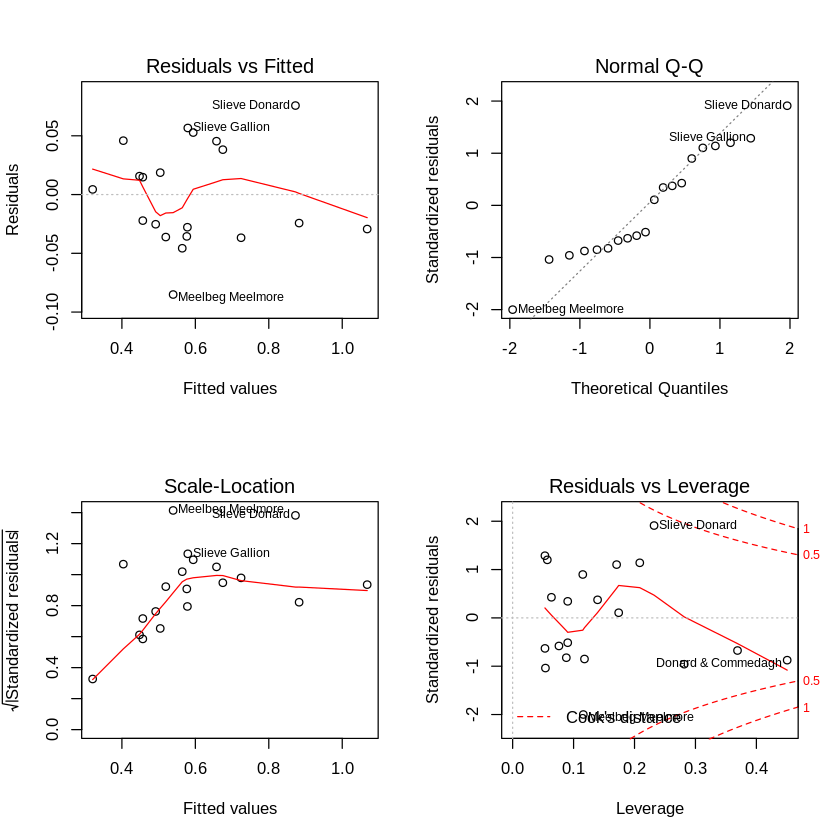

In [14]:
par(mfrow=c(2,2))
plot(nihills.clean.lm)

In [15]:
summary(nihills2.clean.lm)


Call:
lm(formula = time ~ dist + climb + dist:climb, data = nihills.clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.085241 -0.030444 -0.008553  0.039843  0.075714 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -5.662e-02  1.187e-01  -0.477  0.63970   
dist         8.866e-02  2.413e-02   3.674  0.00205 **
climb        1.599e-04  7.103e-05   2.252  0.03874 * 
dist:climb  -3.016e-07  1.317e-05  -0.023  0.98201   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04663 on 16 degrees of freedom
Multiple R-squared:  0.9462,	Adjusted R-squared:  0.9361 
F-statistic: 93.77 on 3 and 16 DF,  p-value: 2.292e-10


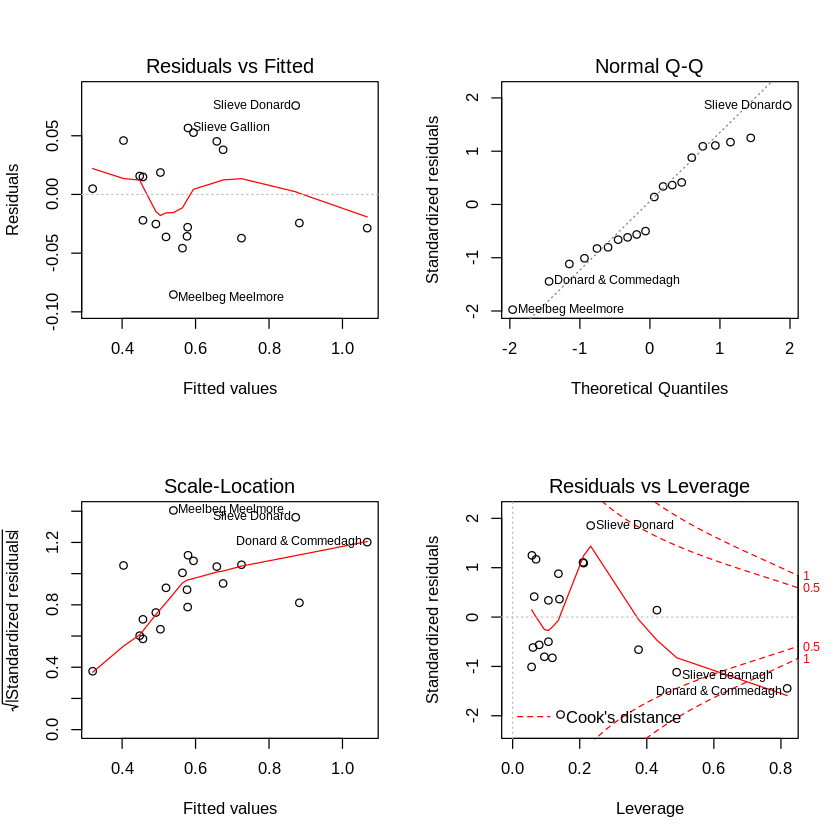

In [16]:
par(mfrow=c(2,2))
plot(nihills2.clean.lm)

In [17]:
anova(nihills.clean.lm, nihills2.clean.lm)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
17,0.03479176,NA,NA,NA,NA
16,0.03479062,1,1.140574e-06,0.000524543,0.9820109


## conclusions:

Removing just 3 data points, the F-ratio decreases to a non-significant value, with a non-significant p-value. Removing high-leverage points revealed the low level of correlation between the variables, as seen in the pairplot.

This high leverage could be solved by taking the logarithm of the variables, thus reducing the extreme leverage and Cook's distance that can be observed in the QQ-plot and residual plot of the first linear model.

As extra work, the log transform is applied here, showing an improvement even without removing outsiders:


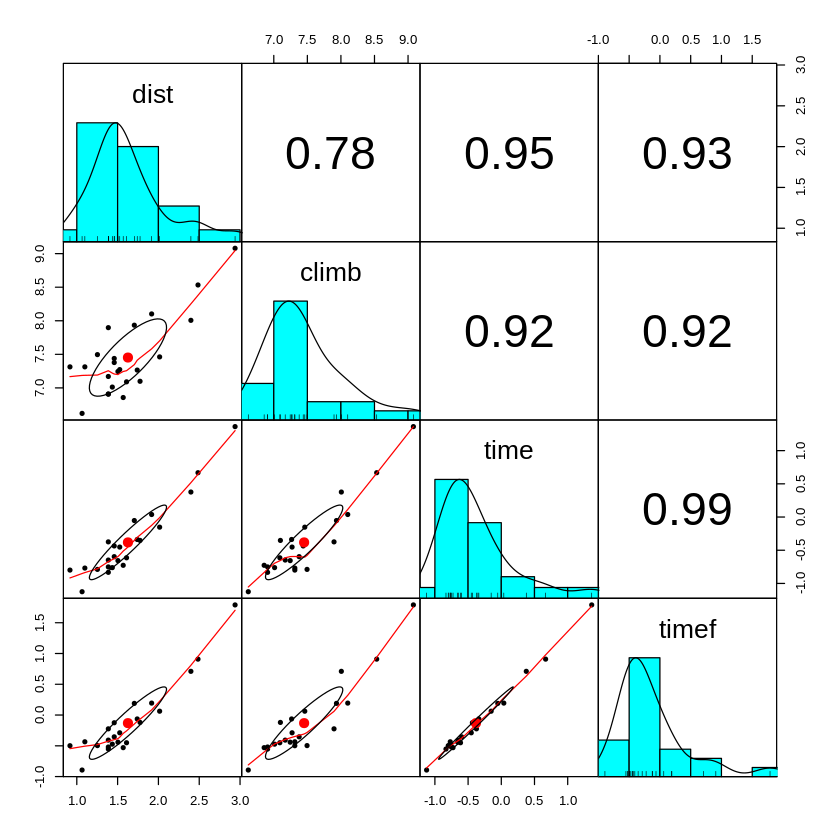

In [18]:
pairs.panels(log(nihills), gap=0)

In [19]:
nihills.log.lm <- lm(log(time) ~ log(dist)+log(climb)           , data=nihills.clean)

In [20]:
summary(nihills.log.lm)


Call:
lm(formula = log(time) ~ log(dist) + log(climb), data = nihills.clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.173486 -0.047388 -0.009307  0.065425  0.113188 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.71238    0.34848 -13.523 1.59e-10 ***
log(dist)    0.64529    0.06924   9.319 4.31e-08 ***
log(climb)   0.43877    0.05100   8.603 1.34e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07733 on 17 degrees of freedom
Multiple R-squared:  0.9368,	Adjusted R-squared:  0.9293 
F-statistic: 125.9 on 2 and 17 DF,  p-value: 6.426e-11


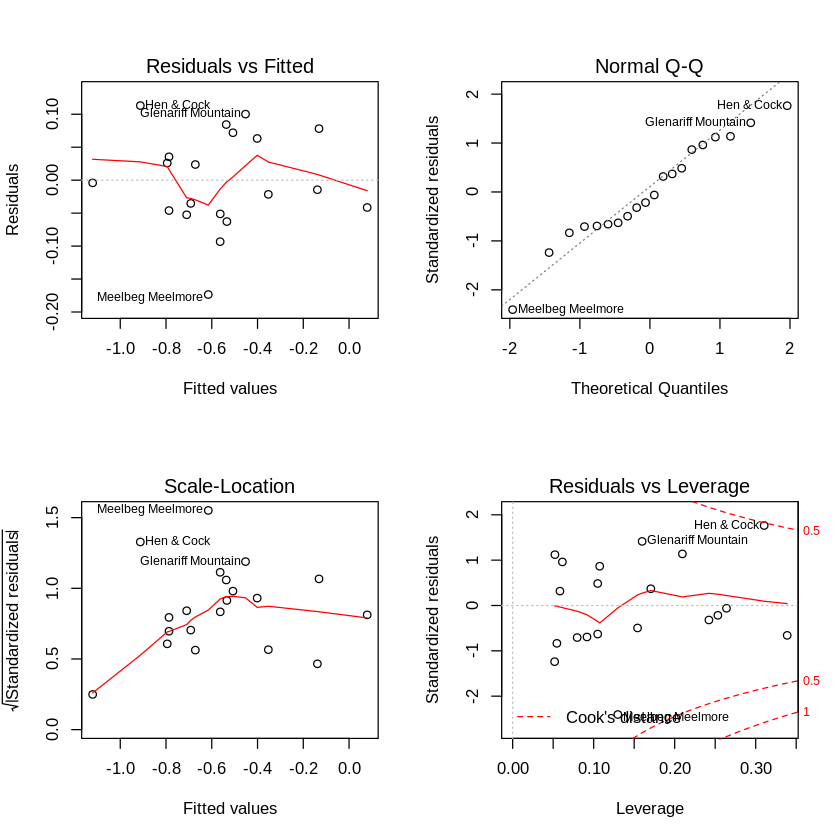

In [21]:
par(mfrow=c(2,2))
plot(nihills.log.lm)

# Exercise 8.8

Check the variance inflation factors for `bodywt` and `lsize` for the model `brainwt ˜ bodywt + lsize`, fitted to the `litters` data set. Comment.

In [22]:
litters

lsize,bodywt,brainwt
3,9.447,0.444
3,9.780,0.436
4,9.155,0.417
4,9.613,0.429
5,8.850,0.425
5,9.610,0.434
6,8.298,0.404
6,8.543,0.439
7,7.400,0.409
7,8.335,0.429


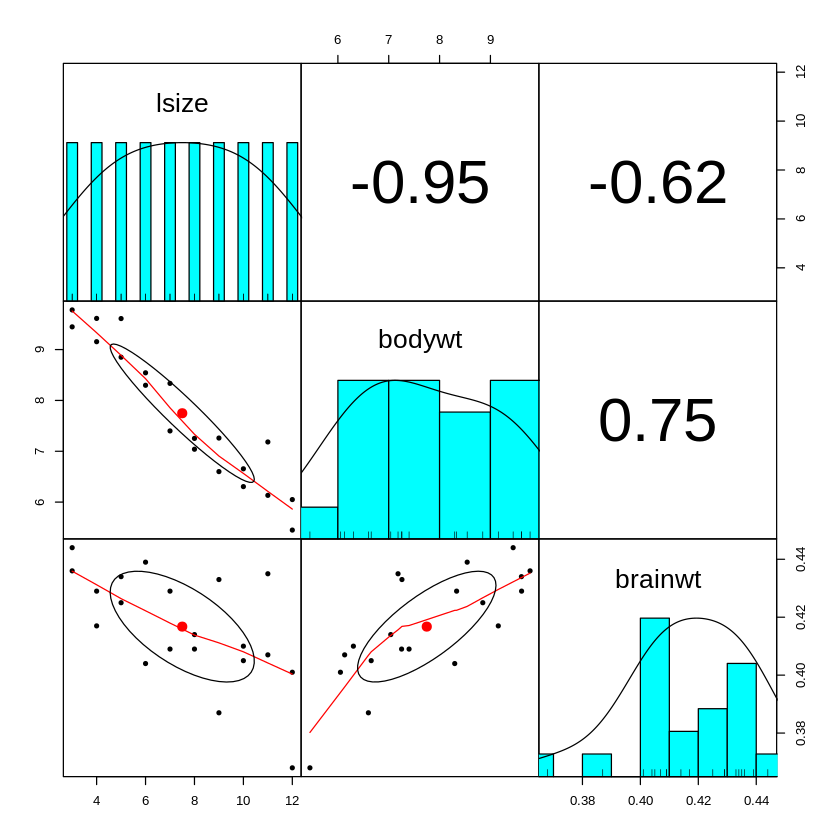

In [23]:
pairs.panels(litters, gap=0)

In [24]:
lit.lm <- lm(brainwt ~ bodywt + lsize, data=litters)

In [25]:
summary(lit.lm)


Call:
lm(formula = brainwt ~ bodywt + lsize, data = litters)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0230005 -0.0098821  0.0004512  0.0092036  0.0180760 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 0.178247   0.075323   2.366  0.03010 * 
bodywt      0.024306   0.006779   3.586  0.00228 **
lsize       0.006690   0.003132   2.136  0.04751 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01195 on 17 degrees of freedom
Multiple R-squared:  0.6505,	Adjusted R-squared:  0.6094 
F-statistic: 15.82 on 2 and 17 DF,  p-value: 0.0001315


In [26]:
library(car)
car::vif(lit.lm)

bodywt    lsize 
11.32982 11.32982

**Commentary:**

The very high value of Variance Inflation Factor of the variables confirms the high collinearity observed in the pairplot, and so we should expect problems from our linear model.

In [27]:
lit2.lm <- lm(brainwt ~ bodywt, data=litters)

In [28]:
summary(lit2.lm)


Call:
lm(formula = brainwt ~ bodywt, data = litters)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.024666 -0.004901 -0.001171  0.007475  0.024171 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.335548   0.017327  19.366 1.68e-13 ***
bodywt      0.010480   0.002204   4.755 0.000158 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01308 on 18 degrees of freedom
Multiple R-squared:  0.5567,	Adjusted R-squared:  0.5321 
F-statistic: 22.61 on 1 and 18 DF,  p-value: 0.0001583


As a proof, as we can see, removing one of the two variables doesn't affect much our model adjusted R-squared value.

# Exercise 6.8

Apply the `lm.ridge()` function to the `litters` data, using the generalized cross-validation
(GCV) criterion to choose the tuning parameter. (GCV is an approximation to cross-validation.)

(a) In particular, estimate the coefficients of the model relating `brainwt` to `bodywt` and
`lsize` and compare with the results obtained using `lm()`.

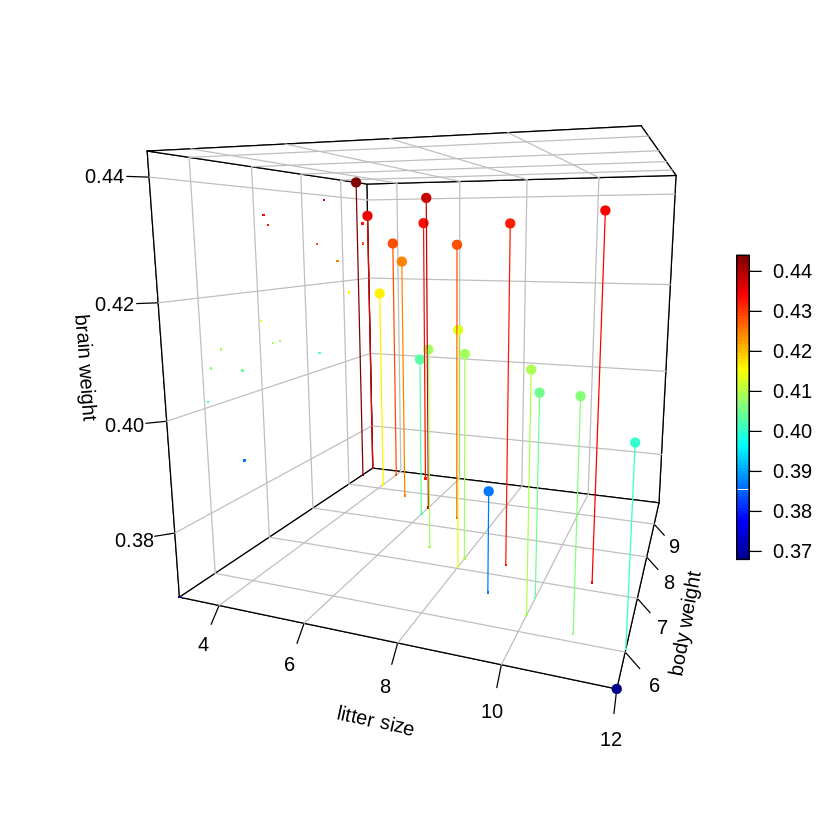

In [29]:
# plot litters in 3D
# because of its beauty, shamelessly taken from:
# http://www.sthda.com/english/wiki/impressive-package-for-3d-and-4d-graph-r-software-and-data-visualization

scatter3D_fancy <- function(x, y, z,..., colvar = z)
  {
   panelfirst <- function(pmat) {
      XY <- trans3D(x, y, z = rep(min(z), length(z)), pmat = pmat)
      scatter2D(XY$x, XY$y, colvar = colvar, pch = ".", 
              cex = 2, add = TRUE, colkey = FALSE)
   
      XY <- trans3D(x = rep(min(x), length(x)), y, z, pmat = pmat)
      scatter2D(XY$x, XY$y, colvar = colvar, pch = ".", 
              cex = 2, add = TRUE, colkey = FALSE)
  }
  scatter3D(x, y, z, ..., colvar = colvar, panel.first=panelfirst,
    colkey = list(length = 0.5, width = 0.5, cex.clab = 0.75)) 
}

scatter3D_fancy(litters$lsize, litters$bodywt, litters$brainwt, pch=19, bty="b2", type="h",
         ticktype = "detailed", theta = 20, phi = 10, xlab = "litter size",
          ylab ="body weight", zlab = "brain weight")

In [30]:
#find optimal lambda for ridge regression:

l = seq (0.001, 100, 0.001)
ridgefit.search <- lm.ridge(brainwt ~ . , data=litters, lambda = l)
select(ridgefit.search)

modified HKB estimator is 0 
modified L-W estimator is 0 
smallest value of GCV  at 0.118 


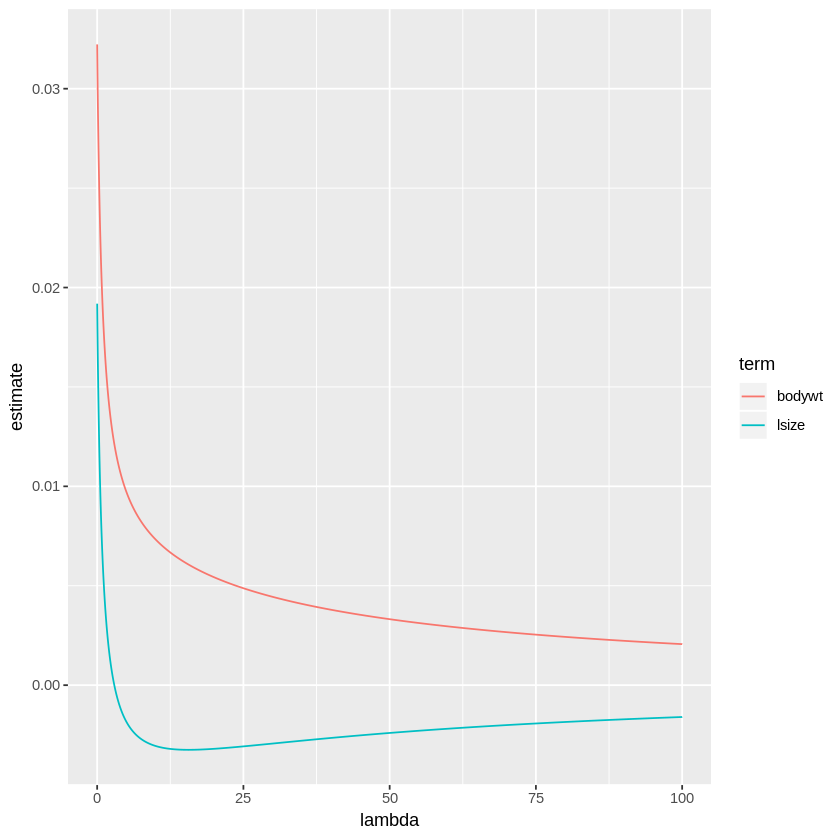

In [31]:
#plot the effect on lambda on ridge regression parameters

ggplot(tidy(ridgefit.search), aes(lambda, estimate, color = term)) + geom_line()

Warning message:
“Removed 180000 rows containing missing values (geom_path).”

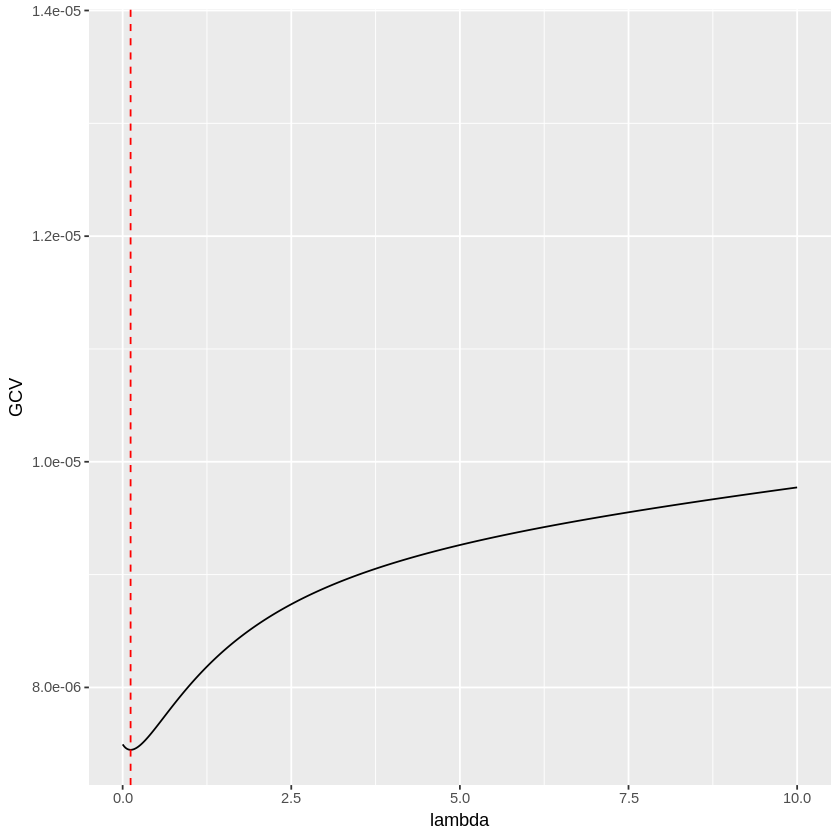

In [32]:
# plot of GCV versus lambda
ggplot(tidy(ridgefit.search), aes(lambda, GCV)) + xlim(0,10) + geom_line() + geom_vline(xintercept = 0.118, col = "red", lty = 2)

In [33]:
# use best lambda to optimize parameters:

ridgefit <- lm.ridge(brainwt ~ ., data=litters, lambda = 0.118)
glance(ridgefit)

kHKB,kLW,lambdaGCV
0,0,0.118


(b) Using both ridge and ordinary regression, estimate the mean brain weight when litter
size is 10 and body weight is 7. 

In [34]:
#lm.ridge does not appear to have a predict method, so we need to compute it by hand:

test <- c(10,7)

pred.ridge <- coef(ridgefit)[1] + coef(ridgefit)[2]*test[1] + coef(ridgefit)[3]*test[2]
print ("Predicted lm.ridge weight for litter size = 10, body weight= 7 is: ")
print (pred.ridge)

[1] "Predicted lm.ridge weight for litter size = 10, body weight= 7 is: "
          
0.4144103 


In [35]:
lmfit <- lm(brainwt ~ lsize + bodywt, data=litters)
coef(lmfit)
test = data.frame(lsize = 10, bodywt = 7)
print ("Predicted lm weight for litter size = 10, body weight= 7 is: ")
print (predict(lmfit, newdata = test))

(Intercept)       lsize      bodywt 
0.178246962 0.006690331 0.024306344

[1] "Predicted lm weight for litter size = 10, body weight= 7 is: "
        1 
0.4152947 


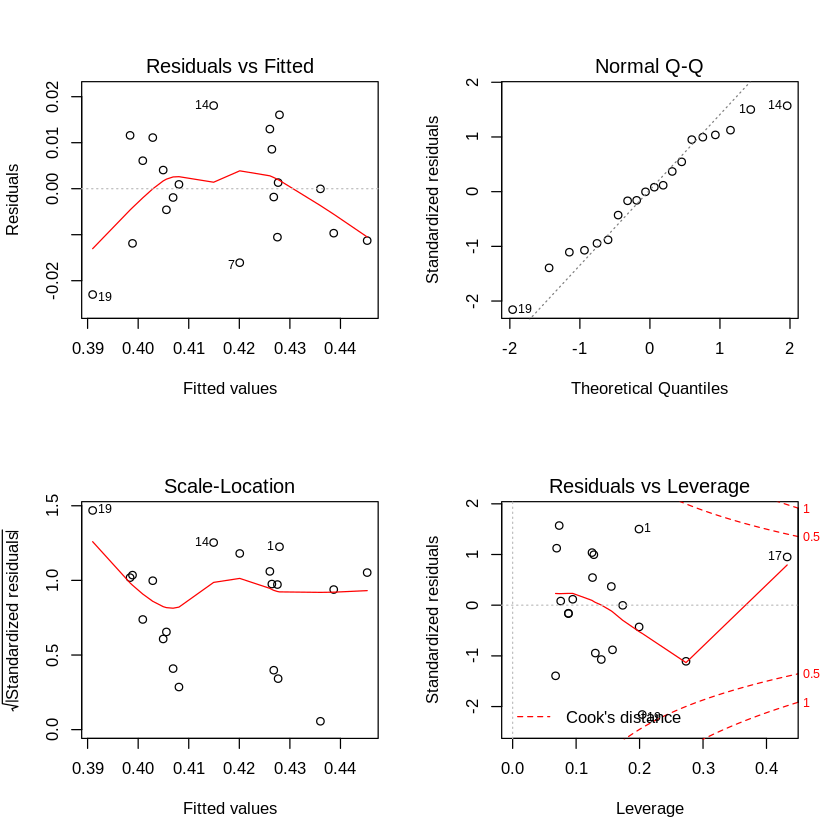

In [36]:
par(mfrow=c(2,2))
plot(lmfit)

Residuals plot for the linear model suggests a non strictly linear regression. Given the requirements of the assignment, the model will be left untouched, but the issue has been noted.

Last part:

Use the bootstrap, with case-resampling, to compute approximate 95% percentile confidence intervals using each method. Compare with the interval obtained using predict.lm().

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 3000 bootstrap replicates

CALL : 
boot.ci(boot.out = results, type = "bca")

Intervals : 
Level       BCa          
95%   ( 0.4043,  0.4224 )  
Calculations and Intervals on Original Scale


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = litters, statistic = rsq, R = 3000, formula = brainwt ~ 
    .)


Bootstrap Statistics :
     original       bias    std. error
t1* 0.4152947 3.422515e-05  0.00441667

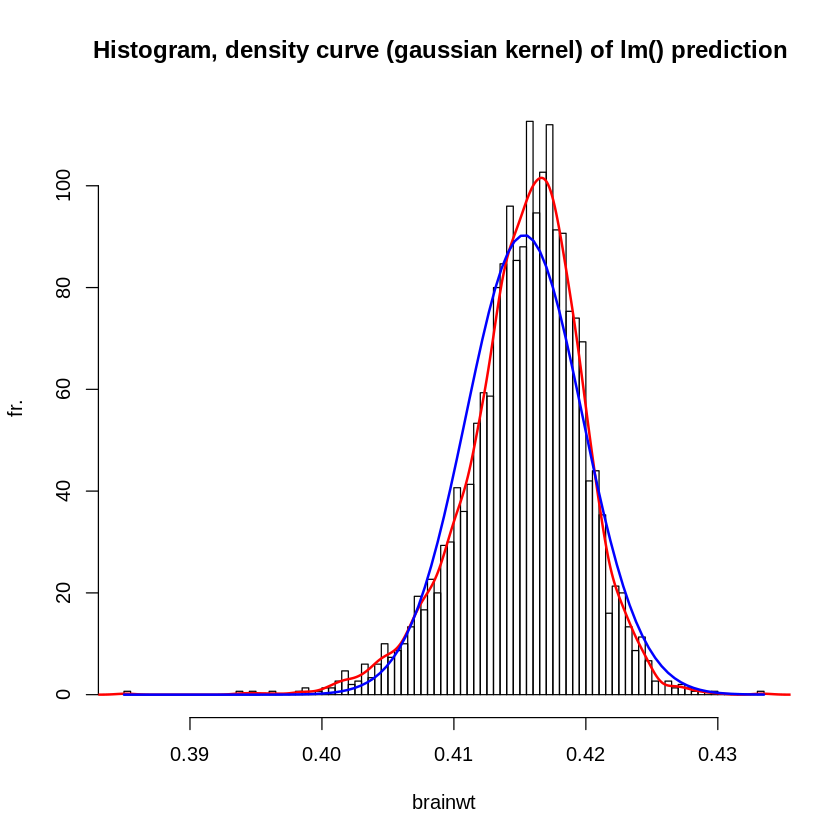

In [105]:
#predicting by bootstrap on lm()

rsq <- function(formula, data, indices) {
  d <- data[indices,] # allows boot to select sample
  fit <- lm(formula, data=d)
  return(predict(fit, newdata = test))
}
# bootstrapping with 1000 replications
results <- boot(data=litters, statistic=rsq,   R=3000, formula=brainwt~.)

# get 95% confidence interval
boot.ci(results, type="bca")

# view results
results
hist(results$t,breaks = 100,freq=F,main="Histogram, density curve (gaussian kernel) of lm() prediction ",xlab="brainwt",ylab="fr.")
lines(density(results$t), col="red", lwd=2) 
curve(dnorm(x, mean = mean(results$t), sd = sd(results$t)), add=TRUE, col="blue",lwd=2)



ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = litters, statistic = rsq, R = 3000, formula = brainwt ~ 
    .)


Bootstrap Statistics :
    original       bias    std. error
t1*  0.41013 2.282667e-05 0.004624714

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 3000 bootstrap replicates

CALL : 
boot.ci(boot.out = results, type = "bca")

Intervals : 
Level       BCa          
95%   ( 0.4003,  0.4183 )  
Calculations and Intervals on Original Scale


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = litters, statistic = rsq, R = 3000, formula = brainwt ~ 
    .)


Bootstrap Statistics :
    original       bias    std. error
t1*  0.41013 2.282667e-05 0.004624714

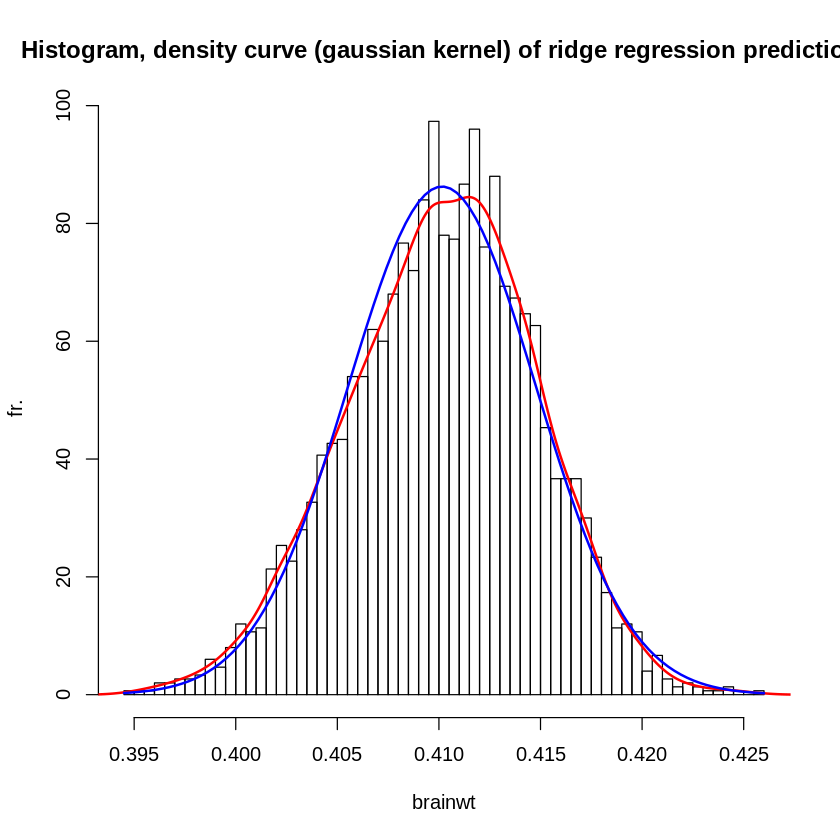

In [106]:
#predicting by bootstrap on lm()

rsq <- function(formula, data, indices) {
  d <- data[indices,] # allows boot to select sample
  ridgefit <- lmridge(formula, data=d, K = 0.118)
  return(coef(ridgefit)[1] + coef(ridgefit)[2]*test$lsize + coef(ridgefit)[3]*test$bodywt)
}
# bootstrapping with 1000 replications
results <- boot(data=litters, statistic=rsq, R=3000, formula=brainwt~.)

# view results
results

# get 95% confidence interval
boot.ci(results, type="bca")

# view results
results
hist(results$t,breaks = 100, freq=F,main="Histogram, density curve (gaussian kernel) of ridge regression prediction ",xlab="brainwt",ylab="fr.")
lines(density(results$t), col="red", lwd=2) 
curve(dnorm(x, mean = mean(results$t), sd = sd(results$t)), add=TRUE, col="blue",lwd=2)

Bootstrapping gives a better normality for ridge regression than linear models. In some repetitions, lm()'s predictions are slightly right-skewed, for unknown reasons.

We have something to take into consideration when computing the CI of ridge regression parameters.

A relevant quote from Jelle Goeman states:

_"It is a very natural question to ask for standard errors of regression coefficients or other estimated quantities. In principle such standard errors can easily be calculated, e.g. using the bootstrap. Still, this package deliberately does not provide them. The reason for this is that standard errors are not very meaningful for strongly biased estimates such as arise from penalized estimation methods. Penalized estimation is a procedure that reduces the variance of estimators by introducing substantial bias. The bias of each estimator is therefore a major component of its mean squared error, whereas its variance may contribute only a small part. Unfortunately, in most applications of penalized regression it is impossible to obtain a suciently precise estimate of the bias. Any bootstrap-based calculations can only give an assessment of the variance of the estimates. Reliable estimates of the bias are only available if reliable unbiased estimates are available, which is typically not the case in situations in which penalized estimates are used.
Reporting a standard error of a penalized estimate therefore tells only part of the story. It can give a mistaken impression of great precision, completely ignoring the inaccuracy caused by the bias. It is certainly a mistake to make con fidence statements that are only based on an assessment of the variance of the estimates, such as bootstrap-based confidence intervals do."